In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

read_file=pd.read_csv('data_banknote_authentication.txt',names=['variance','skewness','kurtosis','Entropy','Class'])

In [3]:
read_file.head()

,variance,skewness,kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Feature Engineering

In [4]:
read_file.isna().sum()

variance    0
skewness    0
kurtosis    0
Entropy     0
Class       0
dtype: int64

In [5]:
read_file['Class']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1342    1
1343    1
1344    1
1345    1
1346    1
1347    1
1348    1
1349    1
1350    1
1351    1
1352    1
1353    1
1354    1
1355    1
1356    1
1357    1
1358    1
1359    1
1360    1
1361    1
1362    1
1363    1
1364    1
1365    1
1366    1
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

## Feature Selection

In [6]:
read_file.columns

Index(['variance', 'skewness', 'kurtosis', 'Entropy', 'Class'], dtype='object')

In [7]:
X=read_file.drop('Class',axis=1)
y=read_file['Class']
y.shape

(1372,)

In [8]:
y.head

<bound method NDFrame.head of 0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1342    1
1343    1
1344    1
1345    1
1346    1
1347    1
1348    1
1349    1
1350    1
1351    1
1352    1
1353    1
1354    1
1355    1
1356    1
1357    1
1358    1
1359    1
1360    1
1361    1
1362    1
1363    1
1364    1
1365    1
1366    1
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64>

In [9]:
import seaborn as sns
# finding correlation between features
corr=X.corr()
corr.shape

(4, 4)

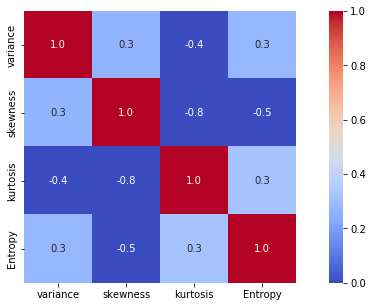

In [10]:
#Plotting heatmap to find correlation between features
plt.figure(figsize=(12,5))
sns.heatmap(corr,vmin=0,vmax=1,annot=True,fmt=".1f",cmap='coolwarm',cbar=True,square= True)
plt.show()

In [11]:
# with the following features we can find highly correlated features
def correlation(dataset,threshold):
    col_corr=set()
    corr=dataset.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>threshold:
                colname=corr.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features=correlation(X,0.2)
print(corr_features)

{'Entropy', 'kurtosis', 'skewness'}


In [13]:
X_new=X.drop(corr_features,axis=1)
X_new


,variance
0,3.621600
1,4.545900
2,3.866000
3,3.456600
4,0.329240
5,4.368400
6,3.591200
7,2.092200
8,3.203200
9,1.535600


## Splitting Training and Test data

In [14]:
from sklearn.model_selection import train_test_split
X_new_train,X_new_test,y_train,y_test=train_test_split(X_new,y,test_size=.30,random_state=1)
y_test.shape

(412,)

## Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(X_new_train,y_train)

GaussianNB()

In [16]:
predicted_naive=naive.predict(X_new_test)

In [17]:
import sklearn.metrics as metrics
cm_naive=metrics.confusion_matrix(y_test,predicted_naive)
accuracy_naive=metrics.accuracy_score(y_test,predicted_naive)
print(accuracy_naive)


0.8422330097087378


In [18]:
print(cm_naive)

[[196  39]
 [ 26 151]]


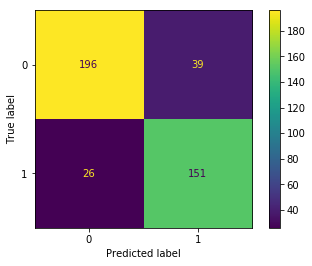

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd=ConfusionMatrixDisplay(cm_naive,display_labels=['0','1'])
cmd.plot()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_naive))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       235
           1       0.79      0.85      0.82       177

    accuracy                           0.84       412
   macro avg       0.84      0.84      0.84       412
weighted avg       0.85      0.84      0.84       412



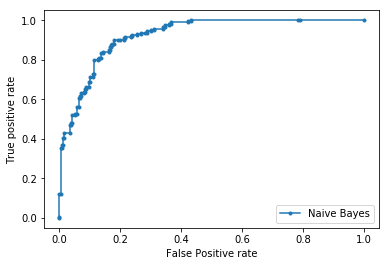

In [21]:
naive_probs=naive.predict_proba(X_new_test)
naive_probs=naive_probs[:,1]

from sklearn.metrics import roc_curve
naive_fpr,naive_tpr,_=roc_curve(y_test,naive_probs)
plt.plot(naive_fpr,naive_tpr,marker='.',label='Naive Bayes')
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

## K-nearest Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_new_train,y_train)

KNeighborsClassifier()

In [23]:
predicted_knn=knn.predict(X_new_test)
print(predicted_knn)

[1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0
 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0
 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0]


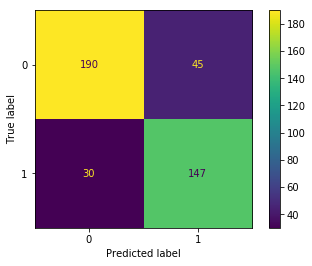

In [24]:
import sklearn.metrics as metrics
from  sklearn.metrics  import ConfusionMatrixDisplay
knn_cm=metrics.confusion_matrix(y_test,predicted_knn)
cmd=ConfusionMatrixDisplay(knn_cm,display_labels=['0','1'])
cmd.plot()



In [25]:
knn_accuracy=metrics.accuracy_score(y_test,predicted_knn)
print(knn_accuracy)

0.8179611650485437


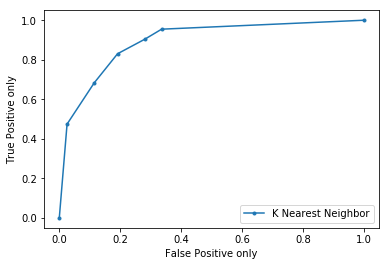

In [26]:
from sklearn.metrics import roc_curve
knn_probs=knn.predict_proba(X_new_test)
knn_probs=knn_probs[:,1]
knn_fpr,knn_tpr,_=roc_curve(y_test,knn_probs)
plt.plot(knn_fpr,knn_tpr,marker='.',label='K Nearest Neighbor')
plt.xlabel('False Positive only')
plt.ylabel('True Positive only')
plt.legend()
plt.show()


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_knn))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       235
           1       0.77      0.83      0.80       177

    accuracy                           0.82       412
   macro avg       0.81      0.82      0.82       412
weighted avg       0.82      0.82      0.82       412



## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_new_train,y_train)

LogisticRegression()

In [29]:
predicted_lr=lr.predict(X_new_test)
print(predicted_lr)

[1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0
 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0]


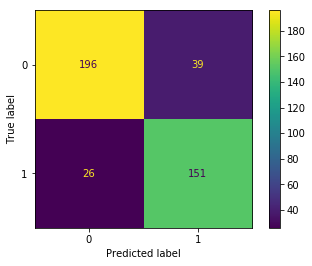

In [30]:
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
lr_cm=metrics.confusion_matrix(y_test,predicted_lr)
cmd=ConfusionMatrixDisplay(lr_cm,display_labels=['0','1'])
cmd.plot()


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_lr))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       235
           1       0.79      0.85      0.82       177

    accuracy                           0.84       412
   macro avg       0.84      0.84      0.84       412
weighted avg       0.85      0.84      0.84       412



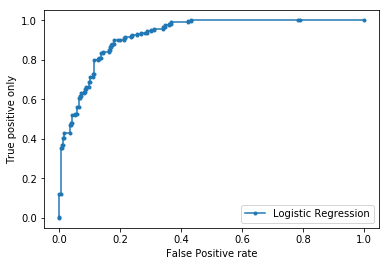

In [32]:
from sklearn.metrics import roc_curve
lr_probs=lr.predict_proba(X_new_test)
lr_probs=lr_probs[:,1]
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_probs)
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True positive only')
plt.legend()
plt.show()

In [33]:
lr_accuracy=metrics.accuracy_score(y_test,predicted_lr)
print(lr_accuracy)

0.8422330097087378


## SVM classifier

In [34]:
from sklearn import svm
svm=svm.SVC(kernel='linear',probability=True)
svm.fit(X_new_train,y_train)


SVC(kernel='linear', probability=True)

In [35]:
predicted_svm=svm.predict(X_new_test)
print(predicted_svm)

[1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0
 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0]


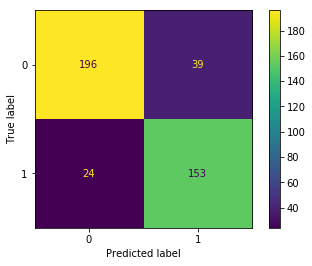

In [36]:
from  sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_svm=metrics.confusion_matrix(y_test,predicted_svm)
cmd=ConfusionMatrixDisplay(cm_svm,display_labels=['0','1'])
cmd.plot()


In [37]:
accuracy_svm=metrics.accuracy_score(y_test,predicted_svm)
print(accuracy_svm)

0.8470873786407767


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_svm))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       235
           1       0.80      0.86      0.83       177

    accuracy                           0.85       412
   macro avg       0.84      0.85      0.85       412
weighted avg       0.85      0.85      0.85       412



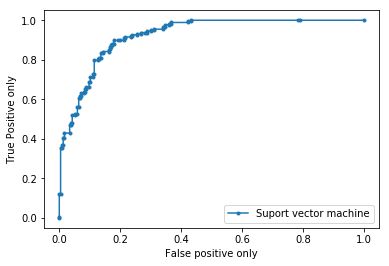

In [39]:
from sklearn.metrics import roc_curve
svm_probs=svm.predict_proba(X_new_test)
svm_probs=svm_probs[:,1]
svm_fpr,svm_tpr,_=roc_curve(y_test,svm_probs)
plt.plot(svm_fpr,svm_tpr,marker='.',label='Suport vector machine')
plt.xlabel('False positive only')
plt.ylabel('True Positive only')
plt.legend()
plt.show()

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_new_train,y_train)

DecisionTreeClassifier()

In [41]:
predicted_dtree=dtree.predict(X_new_test)

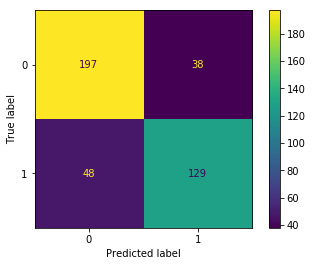

In [42]:
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
cm_dtree=metrics.confusion_matrix(y_test,predicted_dtree)
cmd=ConfusionMatrixDisplay(cm_dtree,display_labels=['0','1'])
cmd.plot()


In [43]:
accuracy_dtree=metrics.accuracy_score(y_test,predicted_dtree)
print(accuracy_dtree)

0.7912621359223301


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_dtree))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       235
           1       0.77      0.73      0.75       177

    accuracy                           0.79       412
   macro avg       0.79      0.78      0.79       412
weighted avg       0.79      0.79      0.79       412



In [45]:
y_test.shape

(412,)

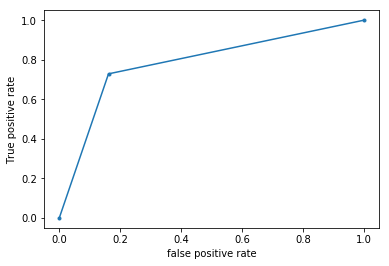

In [46]:
from sklearn.metrics import roc_curve
dtree_probs=dtree.predict_proba(X_new_test)
dtree_probs=dtree_probs[:,1]
dtree_fpr,dtree_tpr,_=roc_curve(y_test,dtree_probs)
plt.plot(dtree_fpr,dtree_tpr,marker='.',label='Decision Tree')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.plot()
plt.show()




## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_new_train,y_train)

RandomForestClassifier()

In [48]:
predicted_rf=rf.predict(X_new_test)

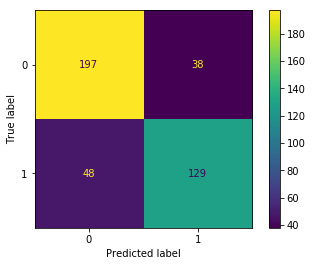

In [49]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
cm_rf=metrics.confusion_matrix(y_test,predicted_rf)
cmd=ConfusionMatrixDisplay(cm_rf,display_labels=['0','1'])
cmd.plot()

In [50]:
accuracy_score=metrics.accuracy_score(y_test,predicted_rf)
print(accuracy_score)

0.7912621359223301


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_rf))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       235
           1       0.77      0.73      0.75       177

    accuracy                           0.79       412
   macro avg       0.79      0.78      0.79       412
weighted avg       0.79      0.79      0.79       412



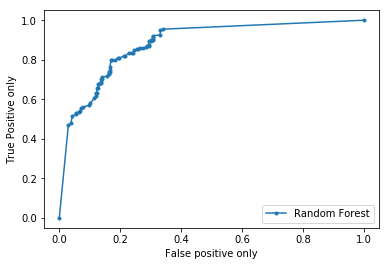

In [52]:
from sklearn.metrics import roc_curve
rf_probs=rf.predict_proba(X_new_test)
rf_probs=rf_probs[:,1]
rf_fpr,rf_tpr,_=roc_curve(y_test,rf_probs)
plt.plot(rf_fpr,rf_tpr,marker='.',label='Random Forest')
plt.xlabel('False positive only')
plt.ylabel('True Positive only')
plt.legend()
plt.show()

In [53]:
results = pd.DataFrame({
    'Model': ['Navies Bayes','KNN', 'Logistic Regression','SVM Classifier' ,'Decision Tree','Random forest'],
    'Score': [0.8422,0.82,0.8422,0.847,0.80,.80]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.8470,SVM Classifier
0.8422,Navies Bayes
0.8422,Logistic Regression
0.8200,KNN
0.8000,Decision Tree
0.8000,Random forest
